## Final Project Submission

Please fill out:
* Student name: Charity Nguru
* Student pace:  part time
* Scheduled project review date/time: 
* Instructor name: NOAH KANDIE
* Blog post URL:


# AVIATION DATA PROJECT

Business Overview;
Content:
Business Problem: The company is evaluating risks in the aviation industry to determine the safest aircraft and operational conditions.
Dataset: Aviation accident data from 1962–2023.
Goal: Recommend aircraft types and safety measures based on data analysis.


Business Understanding

Stakeholder Needs:
The aviation division head requires actionable insights to minimize risk when selecting aircraft for operations. Insights must address safety, reliability, and potential hazards associated with specific aircraft types, flight conditions, or operational factors.

Statement of the Problem
The company seeks to:

i)Identify low-risk aircraft for purchase.
ii)Understand trends in aviation accidents and incidents.
iii)Develop recommendations based on accident frequency, severity, and contributing factors.

Approach:
1. Data Analysis;

i)Investigate trends in accident frequency over time.
ii)Examine relationships between aircraft specifications and safety records.
iii)Assess the impact of external factors (e.g., weather, flight purpose) on safety outcomes.

outcome ...
Content:
. Weather conditions strongly correlate with higher fatalities, especially adverse conditions like storms or fog.
. The landing and takeoff phases have the most accidents.
. A general decline in fatalities is observed after the year 2000, potentially due to better technology and regulations


2. Data Cleaning

. Removed irrelevant columns (e.g., redundant identifiers, report status).
. Addressed missing values by imputing or replacing them with median values or 'Unknown'.
. Extracted key insights from cleaned data.

3. Visualization

Use visual storytelling (e.g., bar charts, heatmaps) to highlight findings.

Include the four charts:
Fatalities by Weather Condition (Bar Chart)
Fatalities by Phase of Flight (Bar Chart)
Fatalities Over weather conditions(bar chart)
Injury Severity Distribution (Pie Chart)

4. Recommendations
. Purchase aircraft models with low fatality and injury records.
. Invest in aircraft with advanced weather-handling technology.
. Enhance safety protocols during takeoff and landing.

5. Next Steps
. Conduct a deeper dive into manufacturer reliability and maintenance logs.
. Incorporate external datasets for a comprehensive risk analysis.
. Use predictive modeling to forecast risk levels.

6. Thank You
Content:
Thank you for your time.
feel free to ask any questions.
Share your contact details: Name: Murugi Nguru | LinkedIn: [Your LinkedIn Profile]

In [2]:
#1. Inspect the Dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
aviation_data = pd.read_csv('data/Aviation_Data.csv')



C:\Users\Murugi\Anaconda3\envs\learn-env\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (6,7,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [58]:
# Display basic info and first rows
print(aviation_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90348 entries, 0 to 90347
Data columns (total 31 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                88889 non-null  object 
 1   Investigation.Type      90348 non-null  object 
 2   Accident.Number         88889 non-null  object 
 3   Event.Date              88889 non-null  object 
 4   Location                88837 non-null  object 
 5   Country                 88663 non-null  object 
 6   Latitude                34382 non-null  object 
 7   Longitude               34373 non-null  object 
 8   Airport.Code            50249 non-null  object 
 9   Airport.Name            52790 non-null  object 
 10  Injury.Severity         87889 non-null  object 
 11  Aircraft.damage         85695 non-null  object 
 12  Aircraft.Category       32287 non-null  object 
 13  Registration.Number     87572 non-null  object 
 14  Make                    88826 non-null

In [4]:
print(aviation_data.head())

         Event.Id Investigation.Type Accident.Number  Event.Date  \
0  20001218X45444           Accident      SEA87LA080  1948-10-24   
1  20001218X45447           Accident      LAX94LA336  1962-07-19   
2  20061025X01555           Accident      NYC07LA005  1974-08-30   
3  20001218X45448           Accident      LAX96LA321  1977-06-19   
4  20041105X01764           Accident      CHI79FA064  1979-08-02   

          Location        Country Latitude Longitude Airport.Code  \
0  MOOSE CREEK, ID  United States      NaN       NaN          NaN   
1   BRIDGEPORT, CA  United States      NaN       NaN          NaN   
2    Saltville, VA  United States  36.9222  -81.8781          NaN   
3       EUREKA, CA  United States      NaN       NaN          NaN   
4       Canton, OH  United States      NaN       NaN          NaN   

  Airport.Name  ... Purpose.of.flight Air.carrier Total.Fatal.Injuries  \
0          NaN  ...          Personal         NaN                  2.0   
1          NaN  ...         

In [5]:
print(aviation_data.describe())


       Number.of.Engines  Total.Fatal.Injuries  Total.Serious.Injuries  \
count       82805.000000          77488.000000            76379.000000   
mean            1.146585              0.647855                0.279881   
std             0.446510              5.485960                1.544084   
min             0.000000              0.000000                0.000000   
25%             1.000000              0.000000                0.000000   
50%             1.000000              0.000000                0.000000   
75%             1.000000              0.000000                0.000000   
max             8.000000            349.000000              161.000000   

       Total.Minor.Injuries  Total.Uninjured  
count          76956.000000     82977.000000  
mean               0.357061         5.325440  
std                2.235625        27.913634  
min                0.000000         0.000000  
25%                0.000000         0.000000  
50%                0.000000         1.000000  
75% 

2. Handle Missing Values
Inspect missing values:

In [6]:
# Percentage of missing values
missing_values = (aviation_data.isnull().sum() / len(aviation_data)) * 100
print(missing_values.sort_values(ascending=False))


Schedule                  86.073848
Air.carrier               81.573471
FAR.Description           64.555939
Aircraft.Category         64.263736
Longitude                 61.954886
Latitude                  61.944924
Airport.Code              44.382831
Airport.Name              41.570372
Broad.phase.of.flight     31.681941
Publication.Date          18.471909
Total.Serious.Injuries    15.461327
Total.Minor.Injuries      14.822686
Total.Fatal.Injuries      14.233851
Engine.Type                9.447913
Report.Status              8.677558
Purpose.of.flight          8.468367
Number.of.Engines          8.348829
Total.Uninjured            8.158454
Weather.Condition          6.586753
Aircraft.damage            5.150086
Registration.Number        3.072564
Injury.Severity            2.721698
Country                    1.865011
Amateur.Built              1.727764
Model                      1.716695
Make                       1.684597
Location                   1.672422
Event.Date                 1

drop columns with >40% missing data;

In [7]:
print(aviation_data.columns)


Index(['Event.Id', 'Investigation.Type', 'Accident.Number', 'Event.Date',
       'Location', 'Country', 'Latitude', 'Longitude', 'Airport.Code',
       'Airport.Name', 'Injury.Severity', 'Aircraft.damage',
       'Aircraft.Category', 'Registration.Number', 'Make', 'Model',
       'Amateur.Built', 'Number.of.Engines', 'Engine.Type', 'FAR.Description',
       'Schedule', 'Purpose.of.flight', 'Air.carrier', 'Total.Fatal.Injuries',
       'Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Uninjured',
       'Weather.Condition', 'Broad.phase.of.flight', 'Report.Status',
       'Publication.Date'],
      dtype='object')


In [8]:

aviation_data.columns = aviation_data.columns.str.strip()


In [9]:
columns_to_drop = [
    'Event.Id', 'Accident.Number', 'Registration.Number', 
    'Report.Status', 'Publication.Date'
]

# Only drop columns that exist in the dataset
aviation_data = aviation_data.drop(
    columns=[col for col in columns_to_drop if col in aviation_data.columns],
    axis=1
)


In [10]:
print(aviation_data.head())


  Investigation.Type  Event.Date         Location        Country Latitude  \
0           Accident  1948-10-24  MOOSE CREEK, ID  United States      NaN   
1           Accident  1962-07-19   BRIDGEPORT, CA  United States      NaN   
2           Accident  1974-08-30    Saltville, VA  United States  36.9222   
3           Accident  1977-06-19       EUREKA, CA  United States      NaN   
4           Accident  1979-08-02       Canton, OH  United States      NaN   

  Longitude Airport.Code Airport.Name Injury.Severity Aircraft.damage  ...  \
0       NaN          NaN          NaN        Fatal(2)       Destroyed  ...   
1       NaN          NaN          NaN        Fatal(4)       Destroyed  ...   
2  -81.8781          NaN          NaN        Fatal(3)       Destroyed  ...   
3       NaN          NaN          NaN        Fatal(2)       Destroyed  ...   
4       NaN          NaN          NaN        Fatal(1)       Destroyed  ...   

  FAR.Description Schedule Purpose.of.flight Air.carrier  \
0       

In [11]:
# Fill numeric columns with median
aviation_data['Total.Fatal.Injuries'] = aviation_data['Total.Fatal.Injuries'].fillna(aviation_data['Total.Fatal.Injuries'].median())
aviation_data['Total.Serious.Injuries'] = aviation_data['Total.Serious.Injuries'].fillna(aviation_data['Total.Serious.Injuries'].median())

# Fill categorical columns with 'Unknown'
aviation_data['Weather.Condition'] = aviation_data['Weather.Condition'].fillna('Unknown')
aviation_data['Broad.phase.of.flight'] = aviation_data['Broad.phase.of.flight'].fillna('Unknown')


In [12]:
print(aviation_data.isnull().sum())


Investigation.Type            0
Event.Date                 1459
Location                   1511
Country                    1685
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity            2459
Aircraft.damage            4653
Aircraft.Category         58061
Make                       1522
Model                      1551
Amateur.Built              1561
Number.of.Engines          7543
Engine.Type                8536
FAR.Description           58325
Schedule                  77766
Purpose.of.flight          7651
Air.carrier               73700
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries      13392
Total.Uninjured            7371
Weather.Condition             0
Broad.phase.of.flight         0
dtype: int64


In [13]:
aviation_data = aviation_data.drop(columns=['Number.of.Engines', 'Engine.Type', 'Purpose.of.flight'])


In [14]:
# Fill categorical columns with the mode (most frequent value)
aviation_data['Location'] = aviation_data['Location'].fillna(aviation_data['Location'].mode()[0])
aviation_data['Country'] = aviation_data['Country'].fillna(aviation_data['Country'].mode()[0])
aviation_data['Injury.Severity'] = aviation_data['Injury.Severity'].fillna(aviation_data['Injury.Severity'].mode()[0])
aviation_data['Aircraft.damage'] = aviation_data['Aircraft.damage'].fillna(aviation_data['Aircraft.damage'].mode()[0])
aviation_data['Make'] = aviation_data['Make'].fillna(aviation_data['Make'].mode()[0])
aviation_data['Model'] = aviation_data['Model'].fillna(aviation_data['Model'].mode()[0])
aviation_data['Amateur.Built'] = aviation_data['Amateur.Built'].fillna(aviation_data['Amateur.Built'].mode()[0])

# Fill numeric columns with the median
aviation_data['Total.Minor.Injuries'] = aviation_data['Total.Minor.Injuries'].fillna(aviation_data['Total.Minor.Injuries'].median())
aviation_data['Total.Uninjured'] = aviation_data['Total.Uninjured'].fillna(aviation_data['Total.Uninjured'].median())


In [15]:
print(aviation_data.isnull().sum())


Investigation.Type            0
Event.Date                 1459
Location                      0
Country                       0
Latitude                  55966
Longitude                 55975
Airport.Code              40099
Airport.Name              37558
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         58061
Make                          0
Model                         0
Amateur.Built                 0
FAR.Description           58325
Schedule                  77766
Air.carrier               73700
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
dtype: int64


In [16]:
aviation_data = aviation_data.dropna(subset=['Event.Date'])


Step 3: Verify Cleaned Data

In [17]:

print(aviation_data.isnull().sum())


Investigation.Type            0
Event.Date                    0
Location                      0
Country                       0
Latitude                  54507
Longitude                 54516
Airport.Code              38640
Airport.Name              36099
Injury.Severity               0
Aircraft.damage               0
Aircraft.Category         56602
Make                          0
Model                         0
Amateur.Built                 0
FAR.Description           56866
Schedule                  76307
Air.carrier               72241
Total.Fatal.Injuries          0
Total.Serious.Injuries        0
Total.Minor.Injuries          0
Total.Uninjured               0
Weather.Condition             0
Broad.phase.of.flight         0
dtype: int64


1. Fatalities by Weather Condition
Objective: Show how fatalities vary under different weather conditions.
Visualization Type: Bar Chart

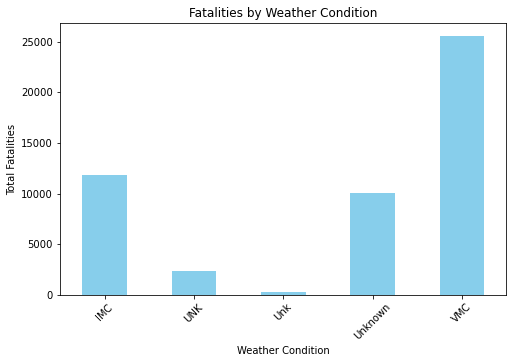

In [18]:
fatalities_weather = aviation_data.groupby('Weather.Condition')['Total.Fatal.Injuries'].sum()
fatalities_weather.plot(kind='bar', color='skyblue', title='Fatalities by Weather Condition', xlabel='Weather Condition', ylabel='Total Fatalities', figsize=(8, 5))
plt.xticks(rotation=45)
plt.show()


2. Fatalities by Phase of Flight
Objective: Identify which flight phases are the riskiest.
Visualization Type: Bar Chart

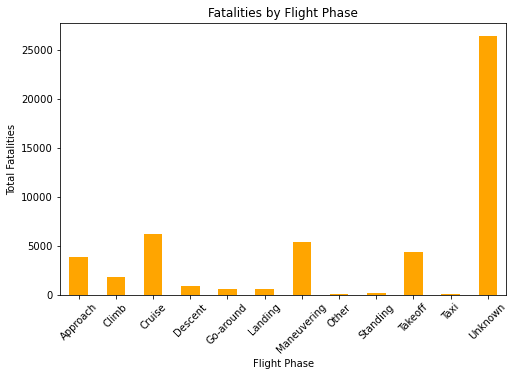

In [19]:
fatalities_phase = aviation_data.groupby('Broad.phase.of.flight')['Total.Fatal.Injuries'].sum()
fatalities_phase.plot(kind='bar', color='orange', title='Fatalities by Flight Phase', xlabel='Flight Phase', ylabel='Total Fatalities', figsize=(8, 5))
plt.xticks(rotation=45)
plt.show()


In [79]:
print(aviation_data.columns)


Index(['Investigation.Type', 'Event.Date', 'Location', 'Country', 'Latitude',
       'Longitude', 'Airport.Code', 'Airport.Name', 'Injury.Severity',
       'Aircraft.damage', 'Aircraft.Category', 'Make', 'Model',
       'Amateur.Built', 'FAR.Description', 'Schedule', 'Air.carrier',
       'Total.Fatal.Injuries', 'Total.Serious.Injuries',
       'Total.Minor.Injuries', 'Total.Uninjured', 'Weather.Condition',
       'Broad.phase.of.flight', 'Year'],
      dtype='object')


4. Injury Severity Distribution
Objective: Highlight the distribution of injury severity across all accidents.
Visualization Type: Pie Chart

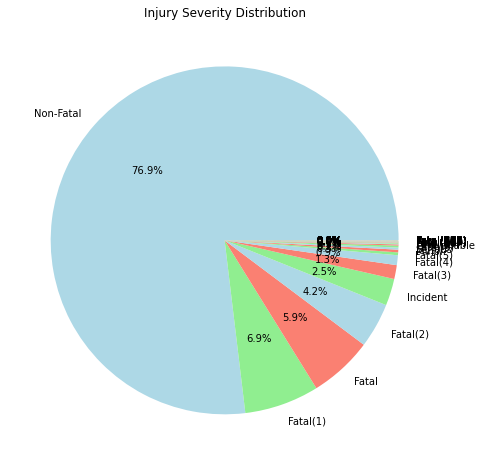

In [22]:
injury_severity = aviation_data['Injury.Severity'].value_counts()
injury_severity.plot(kind='pie', autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'salmon'], title='Injury Severity Distribution', figsize=(8, 8))
plt.ylabel('')
plt.show()


<AxesSubplot:title={'center':'Fatalities by Weather Condition'}, xlabel='Weather Condition', ylabel='Total Fatalities'>

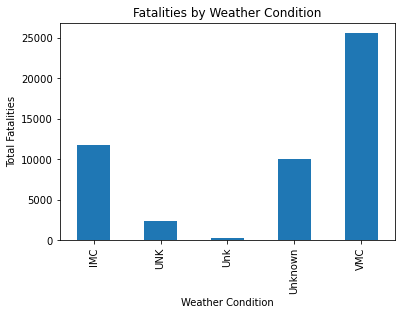

In [80]:
fatality_analysis = aviation_data.groupby('Weather.Condition')['Total.Fatal.Injuries'].sum()
fatality_analysis.plot(kind='bar', title='Fatalities by Weather Condition', xlabel='Weather Condition', ylabel='Total Fatalities')


 use Broad.phase.of.flight to analyze fatalities during different phases of flight:

<AxesSubplot:title={'center':'Fatalities by Flight Phase'}, xlabel='Phase of Flight', ylabel='Total Fatalities'>

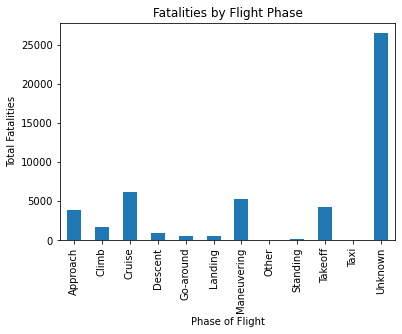

In [81]:
fatality_analysis = aviation_data.groupby('Broad.phase.of.flight')['Total.Fatal.Injuries'].sum()
fatality_analysis.plot(kind='bar', title='Fatalities by Flight Phase', xlabel='Phase of Flight', ylabel='Total Fatalities')
